<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week7_Day1_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
def load_local_texts(filepaths):
    corpus = []
    for path in filepaths:
        with open(path, 'r', encoding='utf-8') as f:
            text = f.read()
            start = text.find('START')
            end = text.find('*** END')
            text = text[start:end] if start != -1 and end != -1 else text
            text = re.sub(r'[^A-Za-z\s]', '', text)
            text = re.sub(r'\s+', ' ', text).strip()
            corpus.append(text)
    return corpus

# Exemple :
filepaths = ['/content/Alice.txt', '/content/Gutenberg.txt', '/content/Tangled.txt']
corpus = load_local_texts(filepaths)
# Print the first 200 characteres of each text.
for i, text in enumerate(corpus):
    print(f"\nLivre {i+1} - Extrait :\n{text[:200]}")


Livre 1 - Extrait :
START OF THE PROJECT GUTENBERG EBOOK ALICES ADVENTURES IN WONDERLAND Illustration Alices Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION Contents CHAPTER I Down the RabbitHole

Livre 2 - Extrait :
START OF THE PROJECT GUTENBERG EBOOK THROUGH THE LOOKINGGLASS Illustration THROUGH THE LOOKINGGLASS And What Alice Found There By Lewis Carroll The Millennium Fulcrum Edition DRAMATIS PERSON As arrang

Livre 3 - Extrait :
START OF THE PROJECT GUTENBERG EBOOK A TANGLED TALE Produced by Chris Curnow Carla Foust Lindy Walsh and the Online Distributed Proofreading Team at httpswwwpgdpnet Music transcribed by Linda Cantoni 


In [ ]:
start = text.find('START')
end = text.find('*** END')
text = text[start:end] if start != -1 and end != -1 else text

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# TÃ©lÃ©charger les ressources nÃ©cessaires
nltk.download('punkt_tab')

# Tokeniser chaque livre
tokenized_books = [word_tokenize(text) for text in corpus]

# Afficher les 150 premiers tokens pour chaque livre
for i, tokens in enumerate(tokenized_books):
    print(f"\nLivre {i+1} - 150 premiers tokens :")
    print(tokens[:150])


Livre 1 - 150 premiers tokens :
['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'ALICES', 'ADVENTURES', 'IN', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'THE', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'Contents', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'The', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'A', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'CHAPTER', 'IV', 'The', 'Rabbit', 'Sends', 'in', 'a', 'Little', 'Bill', 'CHAPTER', 'V', 'Advice', 'from', 'a', 'Caterpillar', 'CHAPTER', 'VI', 'Pig', 'and', 'Pepper', 'CHAPTER', 'VII', 'A', 'Mad', 'TeaParty', 'CHAPTER', 'VIII', 'The', 'Queens', 'CroquetGround', 'CHAPTER', 'IX', 'The', 'Mock', 'Turtles', 'Story', 'CHAPTER', 'X', 'The', 'Lobster', 'Quadrille', 'CHAPTER', 'XI', 'Who', 'Stole', 'the', 'Tarts', 'CHAPTER', 'XII', 'Alices', 'Evidence', 'CHAPTER', 'I', 'Down', 'the', 'RabbitHole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting'

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Liste des stopwords anglais
stop_words = set(stopwords.words('english'))

# Supprimer les stopwords de chaque livre
filtered_books = []
for tokens in tokenized_books:
    filtered = [word for word in tokens if word.lower() not in stop_words]
    filtered_books.append(filtered)

# âœ… VÃ©rification : regarder si certains stopwords ont Ã©tÃ© supprimÃ©s
check_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves']

# Affichage
for i, filtered_tokens in enumerate(filtered_books):
    print(f"\nLivre {i+1} - VÃ©rification des stopwords supprimÃ©s :")
    for word in check_words:
        count = filtered_tokens.count(word)
        print(f"  {word} â†’ {count} occurrence(s)")


Livre 1 - VÃ©rification des stopwords supprimÃ©s :
  i â†’ 0 occurrence(s)
  me â†’ 0 occurrence(s)
  my â†’ 0 occurrence(s)
  myself â†’ 0 occurrence(s)
  we â†’ 0 occurrence(s)
  our â†’ 0 occurrence(s)
  ours â†’ 0 occurrence(s)
  ourselves â†’ 0 occurrence(s)

Livre 2 - VÃ©rification des stopwords supprimÃ©s :
  i â†’ 0 occurrence(s)
  me â†’ 0 occurrence(s)
  my â†’ 0 occurrence(s)
  myself â†’ 0 occurrence(s)
  we â†’ 0 occurrence(s)
  our â†’ 0 occurrence(s)
  ours â†’ 0 occurrence(s)
  ourselves â†’ 0 occurrence(s)

Livre 3 - VÃ©rification des stopwords supprimÃ©s :
  i â†’ 0 occurrence(s)
  me â†’ 0 occurrence(s)
  my â†’ 0 occurrence(s)
  myself â†’ 0 occurrence(s)
  we â†’ 0 occurrence(s)
  our â†’ 0 occurrence(s)
  ours â†’ 0 occurrence(s)
  ourselves â†’ 0 occurrence(s)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import PorterStemmer

# Initialiser le stemmer
stemmer = PorterStemmer()

# Appliquer le stemming Ã  chaque livre
stemmed_books = []
for tokens in filtered_books:
    stemmed = [stemmer.stem(word) for word in tokens]
    stemmed_books.append(stemmed)

# Afficher les 50 premiers tokens stemmÃ©s pour chaque livre
for i, stemmed_tokens in enumerate(stemmed_books):
    print(f"\nLivre {i+1} - 50 premiers stemmed tokens :")
    print(stemmed_tokens[:50])


Livre 1 - 50 premiers stemmed tokens :
['start', 'project', 'gutenberg', 'ebook', 'alic', 'adventur', 'wonderland', 'illustr', 'alic', 'adventur', 'wonderland', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'content', 'chapter', 'rabbithol', 'chapter', 'ii', 'pool', 'tear', 'chapter', 'iii', 'caucusrac', 'long', 'tale', 'chapter', 'iv', 'rabbit', 'send', 'littl', 'bill', 'chapter', 'v', 'advic', 'caterpillar', 'chapter', 'vi', 'pig', 'pepper', 'chapter', 'vii', 'mad', 'teaparti', 'chapter', 'viii', 'queen', 'croquetground']

Livre 2 - 50 premiers stemmed tokens :
['start', 'project', 'gutenberg', 'ebook', 'lookingglass', 'illustr', 'lookingglass', 'alic', 'found', 'lewi', 'carrol', 'millennium', 'fulcrum', 'edit', 'dramati', 'person', 'arrang', 'commenc', 'game', 'white', 'red', 'piec', 'pawn', 'pawn', 'piec', 'tweedlede', 'daisi', 'daisi', 'humpti', 'dumpti', 'unicorn', 'haigha', 'messeng', 'carpent', 'sheep', 'oyster', 'oyster', 'walru', 'w', 'queen', 'lili', 'tigerlili', 'r', 

In [ ]:
import spacy

# Charger le modÃ¨le prÃ©-entraÃ®nÃ© de spaCy
nlp = spacy.load("en_core_web_sm")

# Appliquer la lemmatisation sur chaque livre
lemmatized_books = []

for text in corpus:
    doc = nlp(text)  # Analyse du texte complet
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemmatized_books.append(lemmas)

# Afficher les 50 premiers lemmes pour chaque livre
for i, lemmas in enumerate(lemmatized_books):
    print(f"\nLivre {i+1} â€“ 50 premiers lemmes :")
    print(lemmas[:50])



Livre 1 â€“ 50 premiers lemmes :
['start', 'of', 'the', 'project', 'GUTENBERG', 'EBOOK', 'alices', 'ADVENTURES', 'in', 'WONDERLAND', 'Illustration', 'Alices', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', 'the', 'MILLENNIUM', 'FULCRUM', 'EDITION', 'content', 'chapter', 'I', 'down', 'the', 'RabbitHole', 'CHAPTER', 'II', 'the', 'Pool', 'of', 'Tears', 'CHAPTER', 'III', 'a', 'CaucusRace', 'and', 'a', 'Long', 'Tale', 'chapter', 'IV', 'the', 'Rabbit', 'send', 'in', 'a', 'Little']

Livre 2 â€“ 50 premiers lemmes :
['start', 'of', 'the', 'project', 'GUTENBERG', 'EBOOK', 'through', 'the', 'lookingglass', 'illustration', 'through', 'the', 'lookingglass', 'and', 'what', 'Alice', 'find', 'there', 'by', 'Lewis', 'Carroll', 'the', 'Millennium', 'Fulcrum', 'Edition', 'DRAMATIS', 'person', 'as', 'arrange', 'before', 'commencement', 'of', 'game', 'WHITE', 'RED', 'piece', 'pawns', 'pawns', 'PIECES', 'Tweedledee', 'Daisy', 'Daisy', 'Humpty', 'Dumpty', 'Unicorn', 'Haigha', 'Messenger', 'Car

In [ ]:
from nltk import pos_tag
from nltk.tokenize import word_tokenize
nltk.download('averaged_perceptron_tagger_eng')

# POS tagging de chaque texte
pos_tagged_books = []
for text in corpus:
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    pos_tagged_books.append(tagged)

# Afficher les 20 premiers tags de chaque livre
for i, tagged in enumerate(pos_tagged_books):
    print(f"\nLivre {i+1} â€“ 20 premiers POS tags :")
    for word, tag in tagged[:20]:
        print(f"{word} â†’ {tag}")


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



Livre 1 â€“ 20 premiers POS tags :
START â†’ NNP
OF â†’ IN
THE â†’ NNP
PROJECT â†’ NNP
GUTENBERG â†’ NNP
EBOOK â†’ NNP
ALICES â†’ NNP
ADVENTURES â†’ NNP
IN â†’ NNP
WONDERLAND â†’ NNP
Illustration â†’ NNP
Alices â†’ NNP
Adventures â†’ NNP
in â†’ IN
Wonderland â†’ NNP
by â†’ IN
Lewis â†’ NNP
Carroll â†’ NNP
THE â†’ NNP
MILLENNIUM â†’ NNP

Livre 2 â€“ 20 premiers POS tags :
START â†’ NNP
OF â†’ IN
THE â†’ NNP
PROJECT â†’ NNP
GUTENBERG â†’ NNP
EBOOK â†’ NNP
THROUGH â†’ IN
THE â†’ NNP
LOOKINGGLASS â†’ NNP
Illustration â†’ NNP
THROUGH â†’ IN
THE â†’ NNP
LOOKINGGLASS â†’ NNP
And â†’ CC
What â†’ WP
Alice â†’ NNP
Found â†’ VBD
There â†’ EX
By â†’ IN
Lewis â†’ NNP

Livre 3 â€“ 20 premiers POS tags :
START â†’ NNP
OF â†’ IN
THE â†’ NNP
PROJECT â†’ NNP
GUTENBERG â†’ NNP
EBOOK â†’ NNP
A â†’ NNP
TANGLED â†’ NNP
TALE â†’ NNP
Produced â†’ NNP
by â†’ IN
Chris â†’ NNP
Curnow â†’ NNP
Carla â†’ NNP
Foust â†’ NNP
Lindy â†’ NNP
Walsh â†’ NNP
and â†’ CC
the â†’ DT
Online â†’ NNP


In [ ]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')

for i, text in enumerate(corpus):
    tokens = word_tokenize(text[:1000])
    tags = pos_tag(tokens)
    tree = ne_chunk(tags)

    print(f"\nLivre {i+1} â€“ EntitÃ©s trouvÃ©es :")
    for subtree in tree:
        if hasattr(subtree, 'label'):
            entity = " ".join(leaf[0] for leaf in subtree)
            label = subtree.label()
            print(f"{entity} â†’ {label}")


[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker_tab is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!



Livre 1 â€“ EntitÃ©s trouvÃ©es :
THE â†’ ORGANIZATION
PROJECT â†’ ORGANIZATION
Wonderland â†’ GPE
Lewis Carroll THE â†’ PERSON
MILLENNIUM â†’ ORGANIZATION
RabbitHole â†’ ORGANIZATION
Pool â†’ ORGANIZATION
Tears â†’ PERSON
CaucusRace â†’ ORGANIZATION
Long Tale â†’ ORGANIZATION
Rabbit Sends â†’ ORGANIZATION
Bill â†’ PERSON
Caterpillar â†’ ORGANIZATION
Pepper â†’ PERSON
Queens â†’ ORGANIZATION
Mock Turtles â†’ ORGANIZATION
Lobster Quadrille â†’ ORGANIZATION
Tarts â†’ ORGANIZATION
RabbitHole â†’ ORGANIZATION

Livre 2 â€“ EntitÃ©s trouvÃ©es :
THE â†’ ORGANIZATION
PROJECT â†’ ORGANIZATION
THE â†’ ORGANIZATION
LOOKINGGLASS Illustration â†’ ORGANIZATION
THE â†’ ORGANIZATION
LOOKINGGLASS And What Alice â†’ ORGANIZATION
Lewis Carroll â†’ PERSON
Millennium Fulcrum Edition â†’ FACILITY
DRAMATIS â†’ ORGANIZATION
WHITE â†’ ORGANIZATION
Dumpty Unicorn Haigha Messenger Carpenter Sheep Oyster Oyster Walrus â†’ PERSON
Tigerlily R Queen â†’ PERSON
Oyster Oyster Crow â†’ PERSON
Hatta Frog â†’ PERSON
WHIT

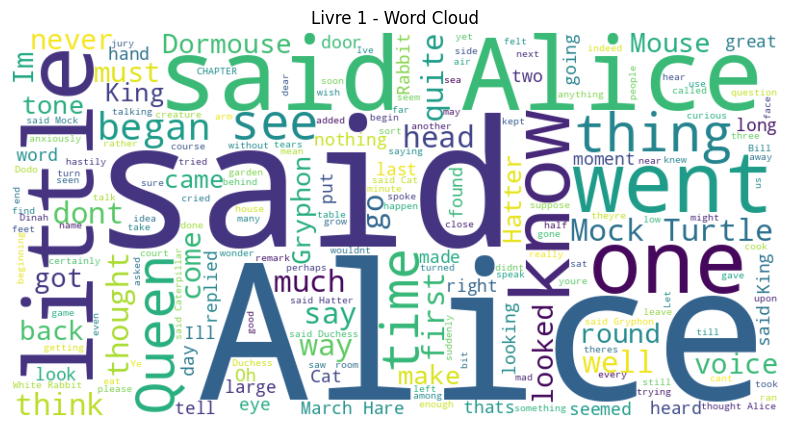

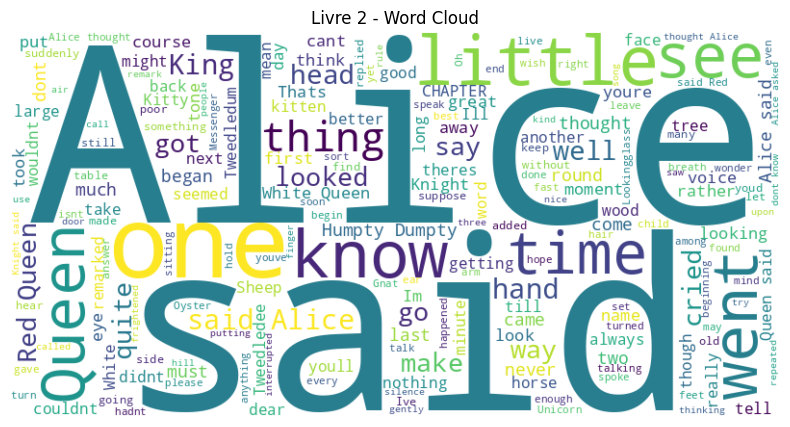

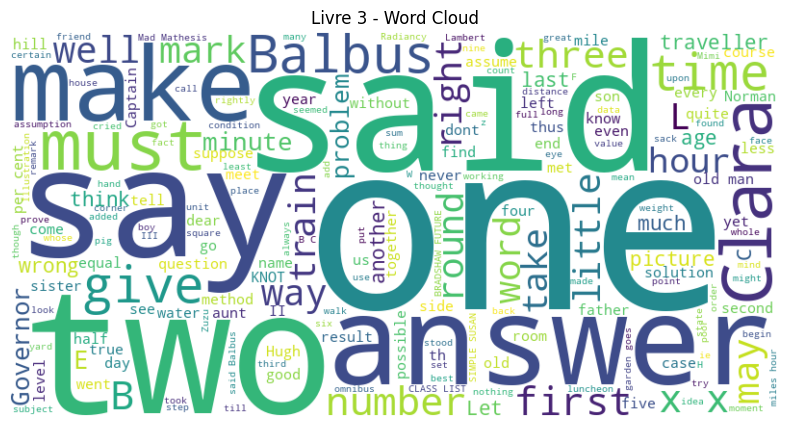

In [29]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# GÃ©nÃ©rer un nuage de mots pour chaque livre
for i, tokens in enumerate(filtered_books):
    # Rejoindre les mots en une seule chaÃ®ne
    text = " ".join(tokens)

    # CrÃ©er le nuage de mots
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Afficher
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Livre {i+1} - Word Cloud")
    plt.show()



Livre 1 â€“ Top 5 mots les plus frÃ©quents (BoW) :
Index 0 | Mot : 'the' | Occurrences : 1639
Index 1 | Mot : 'and' | Occurrences : 846
Index 2 | Mot : 'be' | Occurrences : 836
Index 3 | Mot : 'to' | Occurrences : 721
Index 4 | Mot : 'a' | Occurrences : 632


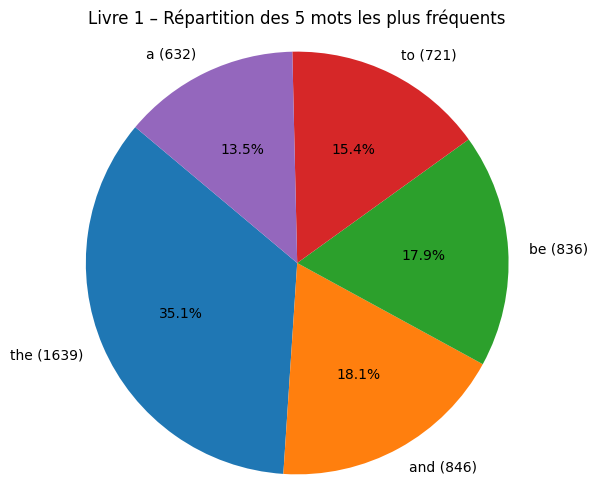


Livre 2 â€“ Top 5 mots les plus frÃ©quents (BoW) :
Index 0 | Mot : 'the' | Occurrences : 1594
Index 1 | Mot : 'be' | Occurrences : 906
Index 2 | Mot : 'and' | Occurrences : 855
Index 3 | Mot : 'a' | Occurrences : 758
Index 4 | Mot : 'to' | Occurrences : 734


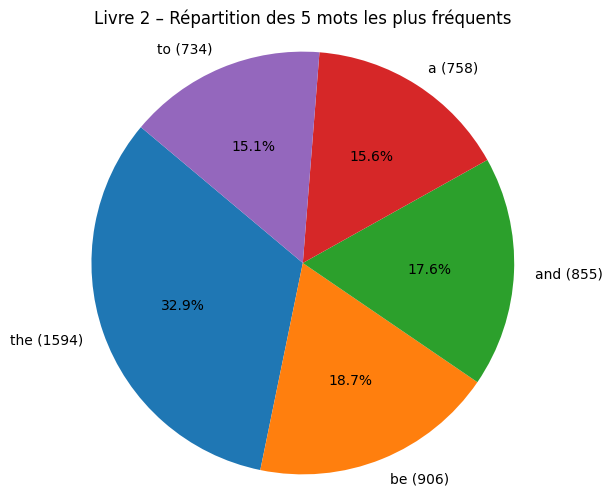


Livre 3 â€“ Top 5 mots les plus frÃ©quents (BoW) :
Index 0 | Mot : 'the' | Occurrences : 1730
Index 1 | Mot : 'be' | Occurrences : 985
Index 2 | Mot : 'of' | Occurrences : 768
Index 3 | Mot : 'and' | Occurrences : 758
Index 4 | Mot : 'to' | Occurrences : 612


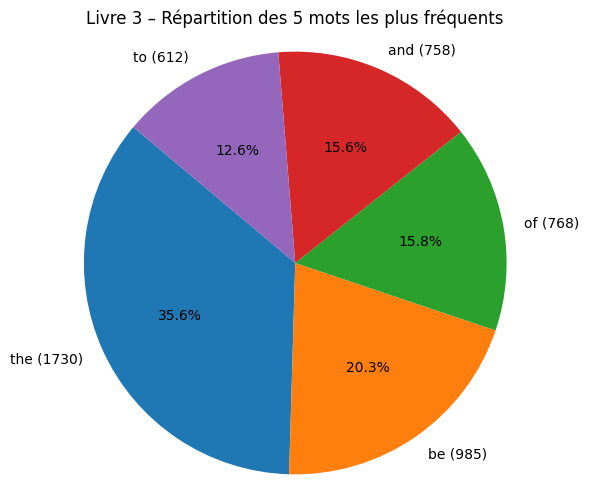

In [30]:
from collections import Counter
import matplotlib.pyplot as plt

# Analyser les livres lemmatisÃ©s
for i, lemmas in enumerate(lemmatized_books):
    # Compter les frÃ©quences
    freq = Counter(lemmas)

    # Obtenir les 5 mots les plus frÃ©quents
    top_5 = freq.most_common(5)

    print(f"\nLivre {i+1} â€“ Top 5 mots les plus frÃ©quents (BoW) :")
    for idx, (word, count) in enumerate(top_5):
        print(f"Index {idx} | Mot : '{word}' | Occurrences : {count}")

    # Afficher un diagramme circulaire
    labels = [f"{word} ({count})" for word, count in top_5]
    counts = [count for _, count in top_5]

    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f"Livre {i+1} â€“ RÃ©partition des 5 mots les plus frÃ©quents")
    plt.axis('equal')
    plt.show()



Livre 1 â€“ Top 5 mots (TF-IDF) :
  gryphon â†’ 0.3474
  rabbit â†’ 0.2843
  turtle â†’ 0.2786
  mock â†’ 0.2738
  hatter â†’ 0.2690


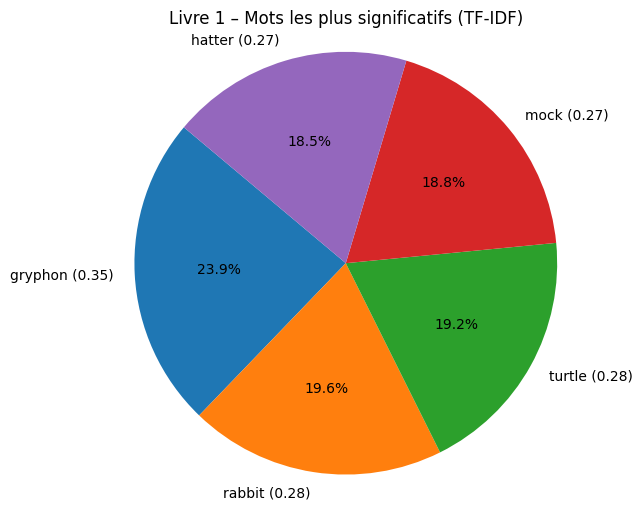


Livre 2 â€“ Top 5 mots (TF-IDF) :
  humpty â†’ 0.3589
  dumpty â†’ 0.3525
  knight â†’ 0.2827
  tweedledum â†’ 0.2307
  horse â†’ 0.1859


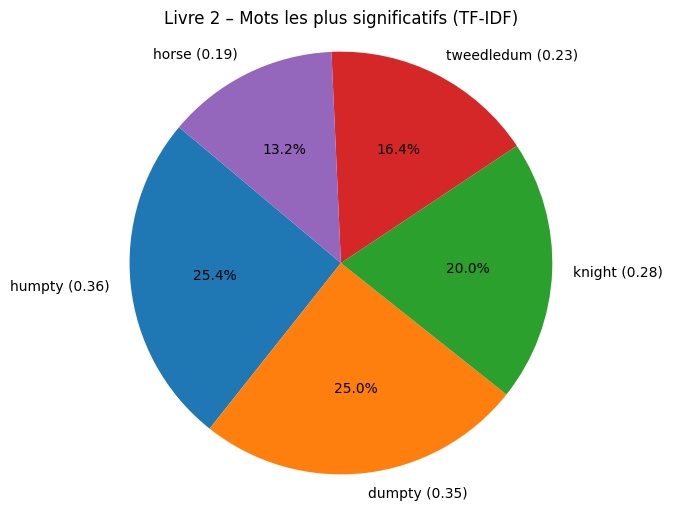


Livre 3 â€“ Top 5 mots (TF-IDF) :
  balbus â†’ 0.3064
  clara â†’ 0.2507
  traveller â†’ 0.1904
  train â†’ 0.1836
  hugh â†’ 0.1439


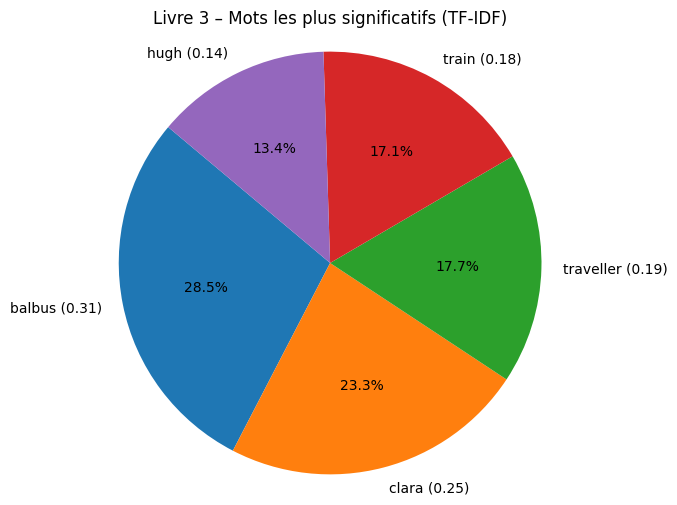

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np

# Convertir les tokens en texte (chaÃ®ne de mots lemmatisÃ©s)
documents = [" ".join(lemmas) for lemmas in lemmatized_books]

# Initialiser le vectoriseur TF-IDF
vectorizer = TfidfVectorizer(min_df=1, max_df=2)
tfidf_matrix = vectorizer.fit_transform(documents)
feature_names = vectorizer.get_feature_names_out()

# Afficher les 5 mots les plus pertinents (plus haut score TF-IDF) par document
for doc_idx in range(tfidf_matrix.shape[0]):
    doc_vector = tfidf_matrix[doc_idx].toarray().flatten()

    # Obtenir les indices des 5 plus grandes valeurs TF-IDF
    top_indices = doc_vector.argsort()[-5:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_scores = [doc_vector[i] for i in top_indices]

    print(f"\nLivre {doc_idx + 1} â€“ Top 5 mots (TF-IDF) :")
    for i in range(5):
        print(f"  {top_words[i]} â†’ {top_scores[i]:.4f}")

    # ðŸŽ¨ Pie plot
    plt.figure(figsize=(6, 6))
    plt.pie(
        top_scores,
        labels=[f"{w} ({s:.2f})" for w, s in zip(top_words, top_scores)],
        autopct="%1.1f%%",
        startangle=140
    )
    plt.title(f"Livre {doc_idx + 1} â€“ Mots les plus significatifs (TF-IDF)")
    plt.axis('equal')
    plt.show()
